## How to merge CSV files and show that Python can open larger files than Excel
Make sure all of the files you want to merge are in the root folder together
or at least the same folder as where your Python code is running. Mine is the root.

Excel can only read about one million rows, whereas, Python has a much larger threshold. Here I will show you the difference.
I have three files that I will merge to create a 1.3 million record dataset.

Note that the merging order is based on the file name order. A-Z

## What happens in Excel
Here is what happens when you open a file that is too big for Excel. You got this pop-up and you can see the bottom of Excel.

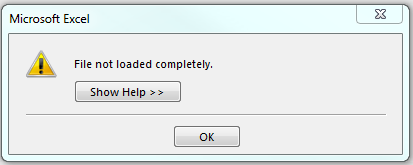

In [19]:
from IPython.display import Image
Image(filename='File count not be fully loaded.png')


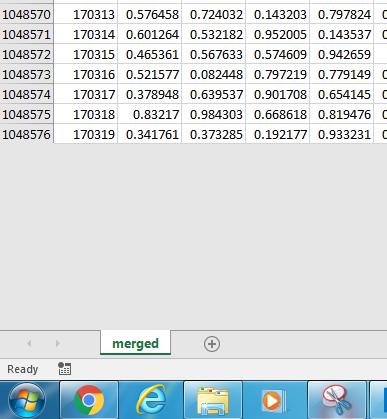

In [20]:
Image(filename='Bottom of Excel.png')

Now I am going to use Python to merge three seperate files and preview the merged file.

In [1]:
import pandas as pd
import os
import time

In [2]:
#This is so we can see how long the code takes to finish
start_time = time.time()

In [3]:
#First I am going to open one of the files
preview_file_1 = pd.read_csv('Trial1.csv', low_memory=False)

In [4]:
#Here is the size of the file
preview_file_1.shape

(439128, 82)

In [5]:
#Here is the last five rows of the file.
preview_file_1.tail()

,Trial,Trial_Attribute_1,Trial_Attribute_2,Trial_Attribute_3,Trial_Attribute_4,Trial_Attribute_5,Trial_Attribute_6,Trial_Attribute_7,Trial_Attribute_8,Trial_Attribute_9,...,Trial_Attribute_72,Trial_Attribute_73,Trial_Attribute_74,Trial_Attribute_75,Trial_Attribute_76,Trial_Attribute_77,Trial_Attribute_78,Trial_Attribute_79,Trial_Attribute_80,Trial_Attribute_81
439123,439124,0.711758616,0.013218,0.213104,0.769286,0.583152,0.966841,0.407853,0.524048,0.633349,...,0.890228,0.981711,0.480368,0.224272,0.253294,0.310301,0.617245,0.950805,0.931752,0.051857
439124,439125,0.432335689,0.860167,0.425848,0.263900,0.152467,0.706517,0.895502,0.711330,0.605817,...,0.587812,0.200654,0.037629,0.064564,0.784310,0.270696,0.931975,0.637583,0.266166,0.697356
439125,439126,0.677751684,0.849347,0.658618,0.510374,0.637504,0.773601,0.125282,0.903924,0.088783,...,0.172455,0.921824,0.056477,0.435184,0.446066,0.059827,0.738826,0.968507,0.073842,0.017736
439126,439127,0.16928601,0.172429,0.328481,0.857521,0.307154,0.100633,0.542157,0.316881,0.341412,...,0.924493,0.456427,0.344953,0.602313,0.398651,0.281322,0.315378,0.907446,0.308975,0.335104
439127,439127,End,0.001066,0.388226,0.872197,0.899893,0.249118,0.572583,0.844964,0.868307,...,0.645790,0.998878,0.368198,0.063604,0.972938,0.118677,0.492562,0.797176,0.166749,0.634630


In [6]:
#This code is running a For loop in the directory where your code is in.
files = [f for f in os.listdir('.') if os.path.isfile(f)]

In [7]:
#This is the list the code will fill later
merged = []

In [8]:
for f in files:    
    filename, ext = os.path.splitext(f)
    #You can see here it is in the file path
    if ext == '.csv':
    #Only if equal to .csv extention
        read = pd.read_csv(f, low_memory=False)
        merged.append(read)
        #open it as a read only and add to merged list

In [9]:
result = pd.concat(merged)
#This is where the Pandas merged the list into a file

In [10]:
result.to_csv('merged.csv')
#Here is your out put file.

In [11]:
print('The files have been merged')
#I put this here. It can take a while
#So you want to know when it is done.

The files have been merged


In [12]:
#Open the merged file
data = pd.read_csv('merged.csv', low_memory = False)

In [13]:
#Here are how many rows and columns there are.
data.shape

(1317384, 83)

In [14]:
#Check the bottom to see the shape and that the last row has been loaded.
data.tail()

,Unnamed: 0,Trial,Trial_Attribute_1,Trial_Attribute_2,Trial_Attribute_3,Trial_Attribute_4,Trial_Attribute_5,Trial_Attribute_6,Trial_Attribute_7,Trial_Attribute_8,...,Trial_Attribute_72,Trial_Attribute_73,Trial_Attribute_74,Trial_Attribute_75,Trial_Attribute_76,Trial_Attribute_77,Trial_Attribute_78,Trial_Attribute_79,Trial_Attribute_80,Trial_Attribute_81
1317379,439123,439124,0.711758616,0.013218,0.213104,0.769286,0.583152,0.966841,0.407853,0.524048,...,0.890228,0.981711,0.480368,0.224272,0.253294,0.310301,0.617245,0.950805,0.931752,0.051857
1317380,439124,439125,0.432335689,0.860167,0.425848,0.263900,0.152467,0.706517,0.895502,0.711330,...,0.587812,0.200654,0.037629,0.064564,0.784310,0.270696,0.931975,0.637583,0.266166,0.697356
1317381,439125,439126,0.677751684,0.849347,0.658618,0.510374,0.637504,0.773601,0.125282,0.903924,...,0.172455,0.921824,0.056477,0.435184,0.446066,0.059827,0.738826,0.968507,0.073842,0.017736
1317382,439126,439127,0.16928601,0.172429,0.328481,0.857521,0.307154,0.100633,0.542157,0.316881,...,0.924493,0.456427,0.344953,0.602313,0.398651,0.281322,0.315378,0.907446,0.308975,0.335104
1317383,439127,439127,Final,0.001066,0.388226,0.872197,0.899893,0.249118,0.572583,0.844964,...,0.645790,0.998878,0.368198,0.063604,0.972938,0.118677,0.492562,0.797176,0.166749,0.634630


In [15]:
#Output of how long the code took to finish
final_time = int(time.time() - start_time)

print ("My program took", final_time, "seconds to run")

My program took 325 seconds to run


In [17]:
#Convert this into minutes and round up to 2nd decimal
final_time_min = final_time/60
final_time_min = str(round(final_time_min,2))
print ("My program took", final_time_min, "minutes to run")

My program took 5.42 minutes to run
